# Linear Regression From Scratch.

This is a notebook which will implement the linear regression model from scratch to predict the salary of a person given his\her years of experience. the linear regression model uses batch gradient descent to optimize the loss of the predictions and mean squared error as the loss function.

In [1]:
from linear_regression import Linear_Regressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

The dataset we are going to work with has two columns the years of expirence and the salaries. 

In [2]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Seperating the Independent variable x from the dependent variable y, in our case <b>Years of Experience</b> is the independent variable while the <b>Salary</b> is the dependent variable because it is what we want to predict.
We will also make them numpy arrays for the machine learning model to work with.

In [3]:
X = np.array(dataset.iloc[:,0])
y = np.array(dataset.iloc[:,1])
print(X[:5],y[:5])

[1.1 1.3 1.5 2.  2.2] [39343. 46205. 37731. 43525. 39891.]


## Spliting the Data !

The next step is to split the data to training and testing data for the machine learning model to train and predict. 

In [4]:
def split_data(X,y,ratio=0.25):
    assert len(X) == len(y)
    n = len(X)
    index = int(n * (1 - ratio))
    X_train = X[:index]
    y_train = y[:index]
    X_test = X[index:]
    y_test = y[index:]
    
    return X_train,y_train,X_test,y_test

In [5]:
X_train, y_train, X_test, y_test = split_data(X,y,0.30)

To train the model we use the linear regression model imported earlier in the note and the the training dataset.

In [6]:
model = Linear_Regressor()

In [29]:
model.train(X_train,y_train,epochs=10000,alpha=0.00001,verbose=0)

Epoch: 0 val loss ======================== 1973627978.7857144
Epoch: 1 val loss ======================== 1972964674.984766
Epoch: 2 val loss ======================== 1972301600.479749
Epoch: 3 val loss ======================== 1971638755.1913862
Epoch: 4 val loss ======================== 1970976139.0404282
Epoch: 5 val loss ======================== 1970313751.9476511
Epoch: 6 val loss ======================== 1969651593.833861
Epoch: 7 val loss ======================== 1968989664.6198905
Epoch: 8 val loss ======================== 1968327964.226598
Epoch: 9 val loss ======================== 1967666492.5748715
Epoch: 10 val loss ======================== 1967005249.585626
Epoch: 11 val loss ======================== 1966344235.179802
Epoch: 12 val loss ======================== 1965683449.278369
Epoch: 13 val loss ======================== 1965022891.8023243
Epoch: 14 val loss ======================== 1964362562.6726902
Epoch: 15 val loss ======================== 1963702461.810519
Epoch: 16 

Epoch: 620 val loss ======================== 1603405694.1341426
Epoch: 621 val loss ======================== 1602870369.3742046
Epoch: 622 val loss ======================== 1602335229.6624699
Epoch: 623 val loss ======================== 1601800274.934959
Epoch: 624 val loss ======================== 1601265505.127716
Epoch: 625 val loss ======================== 1600730920.1768055
Epoch: 626 val loss ======================== 1600196520.0183156
Epoch: 627 val loss ======================== 1599662304.5883546
Epoch: 628 val loss ======================== 1599128273.823055
Epoch: 629 val loss ======================== 1598594427.6585708
Epoch: 630 val loss ======================== 1598060766.031077
Epoch: 631 val loss ======================== 1597527288.876772
Epoch: 632 val loss ======================== 1596993996.131875
Epoch: 633 val loss ======================== 1596460887.7326283
Epoch: 634 val loss ======================== 1595927963.6152964
Epoch: 635 val loss ======================== 1

Epoch: 1269 val loss ======================== 1292144748.8063145
Epoch: 1270 val loss ======================== 1291717016.6356254
Epoch: 1271 val loss ======================== 1291289432.313876
Epoch: 1272 val loss ======================== 1290861995.78995
Epoch: 1273 val loss ======================== 1290434707.0127463
Epoch: 1274 val loss ======================== 1290007565.9311833
Epoch: 1275 val loss ======================== 1289580572.4941967
Epoch: 1276 val loss ======================== 1289153726.650739
Epoch: 1277 val loss ======================== 1288727028.3497813
Epoch: 1278 val loss ======================== 1288300477.5403116
Epoch: 1279 val loss ======================== 1287874074.1713364
Epoch: 1280 val loss ======================== 1287447818.1918788
Epoch: 1281 val loss ======================== 1287021709.5509808
Epoch: 1282 val loss ======================== 1286595748.1977012
Epoch: 1283 val loss ======================== 1286169934.081116
Epoch: 1284 val loss =========

Epoch: 1937 val loss ======================== 1036967932.9481913
Epoch: 1938 val loss ======================== 1036628402.056056
Epoch: 1939 val loss ======================== 1036288988.5180002
Epoch: 1940 val loss ======================== 1035949692.293449
Epoch: 1941 val loss ======================== 1035610513.341842
Epoch: 1942 val loss ======================== 1035271451.6226343
Epoch: 1943 val loss ======================== 1034932507.0952932
Epoch: 1944 val loss ======================== 1034593679.7192996
Epoch: 1945 val loss ======================== 1034254969.4541506
Epoch: 1946 val loss ======================== 1033916376.2593554
Epoch: 1947 val loss ======================== 1033577900.0944388
Epoch: 1948 val loss ======================== 1033239540.9189379
Epoch: 1949 val loss ======================== 1032901298.6924046
Epoch: 1950 val loss ======================== 1032563173.3744055
Epoch: 1951 val loss ======================== 1032225164.9245193
Epoch: 1952 val loss =======

Epoch: 2712 val loss ======================== 806091868.0602874
Epoch: 2713 val loss ======================== 805832132.8271145
Epoch: 2714 val loss ======================== 805572487.35935
Epoch: 2715 val loss ======================== 805312931.6259582
Epoch: 2716 val loss ======================== 805053465.5959142
Epoch: 2717 val loss ======================== 804794089.2382036
Epoch: 2718 val loss ======================== 804534802.5218234
Epoch: 2719 val loss ======================== 804275605.4157805
Epoch: 2720 val loss ======================== 804016497.8890934
Epoch: 2721 val loss ======================== 803757479.9107903
Epoch: 2722 val loss ======================== 803498551.4499109
Epoch: 2723 val loss ======================== 803239712.4755051
Epoch: 2724 val loss ======================== 802980962.9566339
Epoch: 2725 val loss ======================== 802722302.8623688
Epoch: 2726 val loss ======================== 802463732.161792
Epoch: 2727 val loss ======================

Epoch: 3369 val loss ======================== 653408635.1881971
Epoch: 3370 val loss ======================== 653201665.3416748
Epoch: 3371 val loss ======================== 652994767.0173914
Epoch: 3372 val loss ======================== 652787940.1906188
Epoch: 3373 val loss ======================== 652581184.8366374
Epoch: 3374 val loss ======================== 652374500.9307358
Epoch: 3375 val loss ======================== 652167888.4482118
Epoch: 3376 val loss ======================== 651961347.3643711
Epoch: 3377 val loss ======================== 651754877.6545283
Epoch: 3378 val loss ======================== 651548479.294007
Epoch: 3379 val loss ======================== 651342152.258138
Epoch: 3380 val loss ======================== 651135896.522262
Epoch: 3381 val loss ======================== 650929712.0617274
Epoch: 3382 val loss ======================== 650723598.8518915
Epoch: 3383 val loss ======================== 650517556.86812
Epoch: 3384 val loss ========================

Epoch: 4144 val loss ======================== 512668312.0900737
Epoch: 4145 val loss ======================== 512509974.25950253
Epoch: 4146 val loss ======================== 512351691.1370943
Epoch: 4147 val loss ======================== 512193462.7039344
Epoch: 4148 val loss ======================== 512035288.9411144
Epoch: 4149 val loss ======================== 511877169.82973254
Epoch: 4150 val loss ======================== 511719105.35089374
Epoch: 4151 val loss ======================== 511561095.48570913
Epoch: 4152 val loss ======================== 511403140.2152968
Epoch: 4153 val loss ======================== 511245239.52078086
Epoch: 4154 val loss ======================== 511087393.3832921
Epoch: 4155 val loss ======================== 510929601.7839683
Epoch: 4156 val loss ======================== 510771864.70395327
Epoch: 4157 val loss ======================== 510614182.1243974
Epoch: 4158 val loss ======================== 510456554.0264577
Epoch: 4159 val loss =============

Epoch: 4743 val loss ======================== 426981440.4426406
Epoch: 4744 val loss ======================== 426852706.686839
Epoch: 4745 val loss ======================== 426724017.4038745
Epoch: 4746 val loss ======================== 426595372.5783706
Epoch: 4747 val loss ======================== 426466772.1949574
Epoch: 4748 val loss ======================== 426338216.2382689
Epoch: 4749 val loss ======================== 426209704.6929451
Epoch: 4750 val loss ======================== 426081237.54363126
Epoch: 4751 val loss ======================== 425952814.77497774
Epoch: 4752 val loss ======================== 425824436.3716406
Epoch: 4753 val loss ======================== 425696102.3182809
Epoch: 4754 val loss ======================== 425567812.59956485
Epoch: 4755 val loss ======================== 425439567.20016444
Epoch: 4756 val loss ======================== 425311366.1047566
Epoch: 4757 val loss ======================== 425183209.2980236
Epoch: 4758 val loss ================

Epoch: 5388 val loss ======================== 352536627.0189176
Epoch: 5389 val loss ======================== 352433608.86870086
Epoch: 5390 val loss ======================== 352330626.30040836
Epoch: 5391 val loss ======================== 352227679.30173844
Epoch: 5392 val loss ======================== 352124767.86039305
Epoch: 5393 val loss ======================== 352021891.9640784
Epoch: 5394 val loss ======================== 351919051.6005057
Epoch: 5395 val loss ======================== 351816246.75738955
Epoch: 5396 val loss ======================== 351713477.422449
Epoch: 5397 val loss ======================== 351610743.5834075
Epoch: 5398 val loss ======================== 351508045.227993
Epoch: 5399 val loss ======================== 351405382.34393734
Epoch: 5400 val loss ======================== 351302754.91897655
Epoch: 5401 val loss ======================== 351200162.9408509
Epoch: 5402 val loss ======================== 351097606.3973052
Epoch: 5403 val loss ==============

Epoch: 5995 val loss ======================== 296115441.61341995
Epoch: 5996 val loss ======================== 296031908.9356529
Epoch: 5997 val loss ======================== 295948405.10291547
Epoch: 5998 val loss ======================== 295864930.105235
Epoch: 5999 val loss ======================== 295781483.93264204
Epoch: 6000 val loss ======================== 295698066.5751706
Epoch: 6001 val loss ======================== 295614678.022858
Epoch: 6002 val loss ======================== 295531318.26574516
Epoch: 6003 val loss ======================== 295447987.29387695
Epoch: 6004 val loss ======================== 295364685.09730077
Epoch: 6005 val loss ======================== 295281411.6660678
Epoch: 6006 val loss ======================== 295198166.99023294
Epoch: 6007 val loss ======================== 295114951.0598543
Epoch: 6008 val loss ======================== 295031763.8649934
Epoch: 6009 val loss ======================== 294948605.39571524
Epoch: 6010 val loss =============

Epoch: 6695 val loss ======================== 244164447.6365289
Epoch: 6696 val loss ======================== 244098851.61289364
Epoch: 6697 val loss ======================== 244033278.23289475
Epoch: 6698 val loss ======================== 243967727.4887035
Epoch: 6699 val loss ======================== 243902199.3724938
Epoch: 6700 val loss ======================== 243836693.8764423
Epoch: 6701 val loss ======================== 243771210.9927284
Epoch: 6702 val loss ======================== 243705750.7135342
Epoch: 6703 val loss ======================== 243640313.03104433
Epoch: 6704 val loss ======================== 243574897.93744633
Epoch: 6705 val loss ======================== 243509505.4249302
Epoch: 6706 val loss ======================== 243444135.4856891
Epoch: 6707 val loss ======================== 243378788.11191827
Epoch: 6708 val loss ======================== 243313463.29581618
Epoch: 6709 val loss ======================== 243248161.02958378
Epoch: 6710 val loss ============

Epoch: 7395 val loss ======================== 203366973.5328122
Epoch: 7396 val loss ======================== 203315457.96662858
Epoch: 7397 val loss ======================== 203263960.17593887
Epoch: 7398 val loss ======================== 203212480.15459752
Epoch: 7399 val loss ======================== 203161017.89646098
Epoch: 7400 val loss ======================== 203109573.3953877
Epoch: 7401 val loss ======================== 203058146.64523873
Epoch: 7402 val loss ======================== 203006737.6398767
Epoch: 7403 val loss ======================== 202955346.3731667
Epoch: 7404 val loss ======================== 202903972.83897573
Epoch: 7405 val loss ======================== 202852617.03117293
Epoch: 7406 val loss ======================== 202801278.94362986
Epoch: 7407 val loss ======================== 202749958.57021976
Epoch: 7408 val loss ======================== 202698655.9048182
Epoch: 7409 val loss ======================== 202647370.9413032
Epoch: 7410 val loss ==========

Epoch: 8165 val loss ======================== 168526208.80981535
Epoch: 8166 val loss ======================== 168486711.7737844
Epoch: 8167 val loss ======================== 168447228.35800758
Epoch: 8168 val loss ======================== 168407758.5577759
Epoch: 8169 val loss ======================== 168368302.3683822
Epoch: 8170 val loss ======================== 168328859.78512064
Epoch: 8171 val loss ======================== 168289430.80328706
Epoch: 8172 val loss ======================== 168250015.41817892
Epoch: 8173 val loss ======================== 168210613.62509537
Epoch: 8174 val loss ======================== 168171225.41933733
Epoch: 8175 val loss ======================== 168131850.79620704
Epoch: 8176 val loss ======================== 168092489.7510085
Epoch: 8177 val loss ======================== 168053142.27904743
Epoch: 8178 val loss ======================== 168013808.375631
Epoch: 8179 val loss ======================== 167974488.03606814
Epoch: 8180 val loss ==========

Epoch: 8714 val loss ======================== 148767892.16101417
Epoch: 8715 val loss ======================== 148735206.91296187
Epoch: 8716 val loss ======================== 148702532.930094
Epoch: 8717 val loss ======================== 148669870.20851567
Epoch: 8718 val loss ======================== 148637218.74433362
Epoch: 8719 val loss ======================== 148604578.53365567
Epoch: 8720 val loss ======================== 148571949.57259116
Epoch: 8721 val loss ======================== 148539331.85725057
Epoch: 8722 val loss ======================== 148506725.3837461
Epoch: 8723 val loss ======================== 148474130.14819083
Epoch: 8724 val loss ======================== 148441546.14669964
Epoch: 8725 val loss ======================== 148408973.37538844
Epoch: 8726 val loss ======================== 148376411.83037457
Epoch: 8727 val loss ======================== 148343861.50777662
Epoch: 8728 val loss ======================== 148311322.40371493
Epoch: 8729 val loss =======

Epoch: 9266 val loss ======================== 132335174.92605495
Epoch: 9267 val loss ======================== 132308151.58861296
Epoch: 9268 val loss ======================== 132281137.55884703
Epoch: 9269 val loss ======================== 132254132.83353919
Epoch: 9270 val loss ======================== 132227137.40947282
Epoch: 9271 val loss ======================== 132200151.28343189
Epoch: 9272 val loss ======================== 132173174.45220193
Epoch: 9273 val loss ======================== 132146206.91256939
Epoch: 9274 val loss ======================== 132119248.66132195
Epoch: 9275 val loss ======================== 132092299.69524822
Epoch: 9276 val loss ======================== 132065360.01113804
Epoch: 9277 val loss ======================== 132038429.60578234
Epoch: 9278 val loss ======================== 132011508.47597326
Epoch: 9279 val loss ======================== 131984596.61850384
Epoch: 9280 val loss ======================== 131957694.03016832
Epoch: 9281 val loss ====

Epoch: 9910 val loss ======================== 116724244.45914681
Epoch: 9911 val loss ======================== 116702595.6809468
Epoch: 9912 val loss ======================== 116680954.35227326
Epoch: 9913 val loss ======================== 116659320.47055072
Epoch: 9914 val loss ======================== 116637694.03320456
Epoch: 9915 val loss ======================== 116616075.0376609
Epoch: 9916 val loss ======================== 116594463.48134708
Epoch: 9917 val loss ======================== 116572859.36169103
Epoch: 9918 val loss ======================== 116551262.67612174
Epoch: 9919 val loss ======================== 116529673.4220689
Epoch: 9920 val loss ======================== 116508091.59696344
Epoch: 9921 val loss ======================== 116486517.19823681
Epoch: 9922 val loss ======================== 116464950.22332141
Epoch: 9923 val loss ======================== 116443390.66965081
Epoch: 9924 val loss ======================== 116421838.53465916
Epoch: 9925 val loss =======

In [30]:
y_pred = model.predict(X_test)

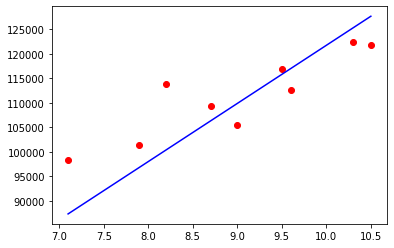

In [31]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.show()

## Using $R^2$ as the metric for accuracy measurement.

In [32]:
def r_squared(y_true,y_pred):
    y_avg = np.sum(y_true) / len(y_true)
    res_error = np.sum((y_true - y_pred)**2)
    total_error  = np.sum((y_true - y_avg)**2)
    
    result = 1 - res_error / total_error
    return result

In [33]:
loss = r_squared(y_test,y_pred)
print(loss)

0.2925283786215679
